# L&S Final Project: Visualizing Neural Networks

In [1]:
# importing packages
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-03-25 19:51:31.866584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [90]:
import random

def shuffle_together(array1, array2):
  """Shuffles two arrays of the same length in the same order.

  Args:
      array1 (list): The first array.
      array2 (list): The second array.

  Returns:
      tuple: A tuple containing the shuffled arrays (array1, array2).
  """

  if len(array1) != len(array2):
    raise ValueError("Arrays must have the same length.")

  shuffled_pairs = list(zip(array1, array2))
  random.shuffle(shuffled_pairs)
  shuffled_array1, shuffled_array2 = zip(*shuffled_pairs)

  return np.array(shuffled_array1), np.array(shuffled_array2)

In [91]:
# loading in the data
fake_folder = './face_data/training_fake'
real_folder = './face_data/training_real'
fake = [cv2.imread(fake_folder + "/" + name) for name in os.listdir(fake_folder)]
real = [cv2.imread(real_folder + "/" + name) for name in os.listdir(real_folder)]

# splitting data
X_train = fake[:769] + real[:865]
X_test = fake[769:] + real[865:]

# generating labels for data
y_train = np.append(np.ones(769),  np.zeros(865))
y_test = np.append(np.ones(191), np.zeros(216))

In [92]:
# shuffling the data
X_train, y_train = shuffle_together(X_train, y_train)

(600, 600, 3)


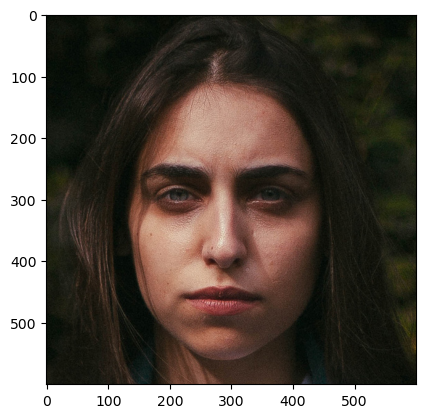

In [82]:
# plotting the an example image
plt.imshow(cv2.cvtColor(real[0], cv2.COLOR_BGR2RGB))
print(real_train[0].shape)

In [60]:
# sequential model with layers
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(600, 600, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Final layer with one neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))  # One neuron for binary classification

# Compile the model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# Fit the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20


: 